# Analyse et conception des algorithmes

## Partie 1 : Afficher un Graphe Non Orienté

### 1.Installer Matplotlib : Assurez-vous que Matplotlib est installé. Si ce n'est pas le cas, installez-le en utilisant pip:

In [1]:
!pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c6/c8/6936e8c7b279a5abac82f399d8d72ac25da530cf5f78a0e40063e492558c/matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)


### 2.Créer la fonction de visualisation de graphe :

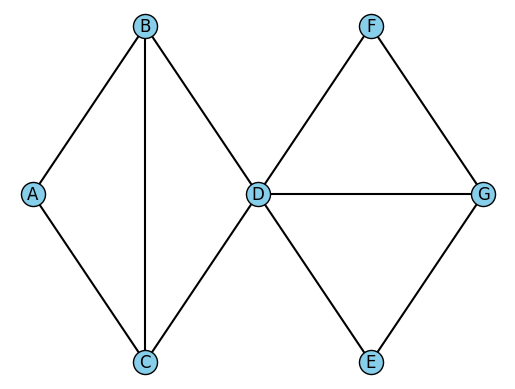

In [13]:
import matplotlib.pyplot as plt

def plot_undirected_graph(edges, node_labels):
    """
    Trace un graphe non orienté en utilisant Matplotlib avec des labels de nœuds et un style amélioré.

    Paramètres :
    edges (liste de tuples) : Liste des arêtes, où chaque arête est représentée par un tuple (noeud1, noeud2).
    node_labels (dict) : Dictionnaire associant les coordonnées aux labels des nœuds (par exemple, { (0, 1): 'A' }).
    """
    # Obtenir une liste de tous les nœuds à partir des arêtes
    nodes = set([node for edge in edges for node in edge])

    # Créer une figure et un axe
    fig, ax = plt.subplots()

    # Dessiner les arêtes
    for edge in edges:
        node1, node2 = edge
        ax.plot([node1[0], node2[0]], [node1[1], node2[1]], 'k-', zorder=1)

    # Dessiner les nœuds avec des cercles plus grands
    node_positions = {node: (node[0], node[1]) for node in nodes}
    ax.scatter([pos[0] for pos in node_positions.values()], [pos[1] for pos in node_positions.values()], s=300, color='skyblue', edgecolors='black', zorder=2)

    # Ajouter les labels des nœuds
    for node, label in node_labels.items():
        ax.text(node[0], node[1], label, fontsize=12, ha='center', va='center', color='black', zorder=3)

    ax.axis('off')
    plt.show()

# Exemple d'utilisation
edges = [((0, 1), (1, 2)), ((0, 1), (1, 0)), ((1, 2), (1, 0)), ((1, 2), (2, 1)), 
         ((1, 0), (2, 1)), ((2, 1), (3, 0)), ((2, 1), (3, 2)), ((2, 1), (4, 1)), 
         ((3, 0), (4, 1)), ((3, 2), (4, 1))]

node_labels = { (0, 1): 'A', (1, 2): 'B', (1, 0): 'C', (2, 1): 'D', (3, 0): 'E', (3, 2): 'F', (4, 1): 'G' }

plot_undirected_graph(edges, node_labels)



## Partie 2 : Adapter la Fonction pour Afficher un Graphe Orienté

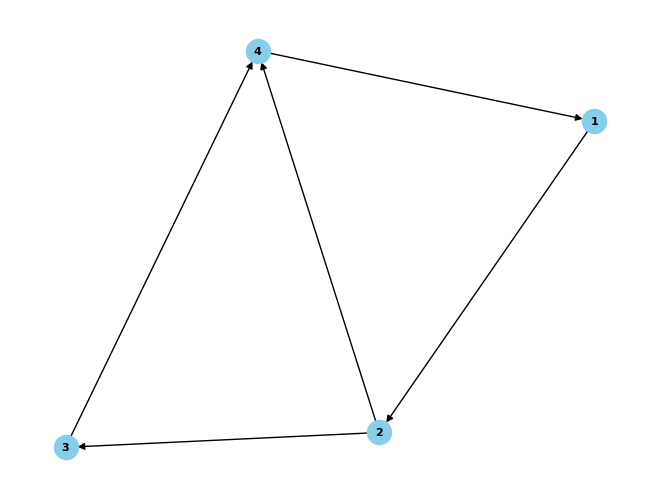

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_directed_graph(edges):
    """
    Trace un graphe orienté en utilisant Matplotlib et NetworkX.

    Paramètres :
    edges (liste de tuples) : Liste des arêtes, où chaque arête est représentée par un tuple (noeud1, noeud2).
    """
    # Créer un graphe orienté
    G = nx.DiGraph()

    # Ajouter des arêtes au graphe
    G.add_edges_from(edges)

    # Dessiner le graphe
    pos = nx.spring_layout(G)  # Calculer la disposition des nœuds
    nx.draw(G, pos, with_labels=True, node_color='skyblue', font_size=8, font_weight='bold', arrows=True)

    plt.show()

# Exemple d'utilisation
edges = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 4)]
plot_directed_graph(edges)


## Partie 3 : Créer une Animation pour le Parcours BFS

In [6]:
%matplotlib inline


### 1.Create the BFS animation function

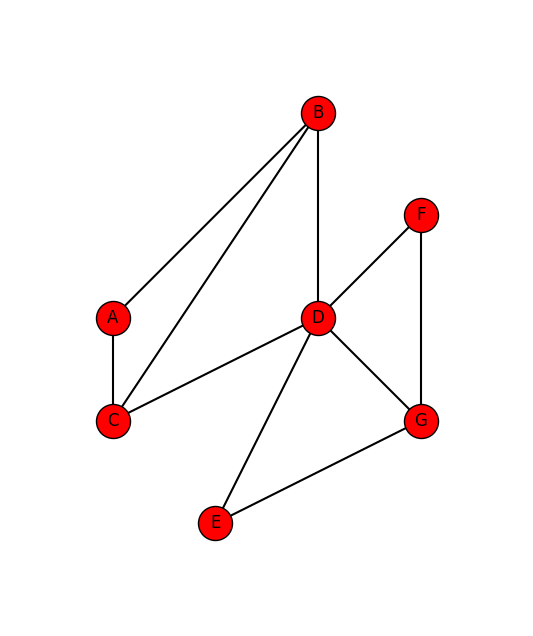

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from collections import deque
from IPython.display import HTML

def plot_undirected_graph_with_fixed_positions(ax, edges, positions, node_colors, node_sizes):
    """
    Trace un graphe non orienté en utilisant Matplotlib avec des positions fixes pour les nœuds.
    
    Paramètres :
    ax : axe de la figure Matplotlib.
    edges (liste de tuples) : Liste des arêtes, où chaque arête est représentée par un tuple (noeud1, noeud2).
    positions (dict) : Dictionnaire des positions fixes des nœuds.
    node_colors (dict) : Dictionnaire des couleurs des nœuds.
    node_sizes (dict) : Dictionnaire des tailles des nœuds.
    """
    # Effacer le tracé précédent
    ax.clear()

    # Dessiner les arêtes
    for edge in edges:
        node1, node2 = edge
        x_values = [positions[node1][0], positions[node2][0]]
        y_values = [positions[node1][1], positions[node2][1]]
        ax.plot(x_values, y_values, 'k-', zorder=1)

    # Dessiner les nœuds
    for node, (x, y) in positions.items():
        color = node_colors.get(node, 'skyblue')
        size = node_sizes.get(node, 300)  # Taille par défaut augmentée pour une meilleure visibilité
        ax.scatter(x, y, s=size, color=color, edgecolors='black', zorder=2)
        ax.text(x, y, node, fontsize=12, ha='center', va='center', color='black', zorder=3)

    ax.set_aspect('equal')
    ax.axis('off')

def animate_bfs(edges, start_node):
    """
    Crée une animation du parcours en largeur (BFS) d'un graphe non orienté.
    
    Paramètres :
    edges (liste de tuples) : Liste des arêtes.
    start_node : Nœud de départ pour le parcours BFS.
    """
    # Définir les positions fixes pour les nœuds
    positions = {
        'A': (1, 2),
        'B': (3, 4),
        'C': (1, 1),
        'D': (3, 2),
        'E': (2, 0),
        'F': (4, 3),
        'G': (4, 1)
    }

    # Créer la liste d'adjacence
    adjacency_list = {node: [] for edge in edges for node in edge}
    for node1, node2 in edges:
        adjacency_list[node1].append(node2)
        adjacency_list[node2].append(node1)

    # Parcours BFS
    visited = set()
    queue = deque([start_node])
    bfs_sequence = []

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            bfs_sequence.append(node)
            for neighbor in adjacency_list[node]:
                if neighbor not in visited:
                    queue.append(neighbor)

    # Configurer l'animation
    fig, ax = plt.subplots(figsize=(10, 8))  # Taille de la figure ajustée

    def update(frame):
        node_colors = {node: 'skyblue' for node in positions}
        node_sizes = {node: 300 for node in positions}  # Taille par défaut des nœuds

        for i in range(frame + 1):
            node = bfs_sequence[i]
            node_colors[node] = 'red'
            node_sizes[node] = 600  # Taille augmentée pour les nœuds visités

        plot_undirected_graph_with_fixed_positions(ax, edges, positions, node_colors, node_sizes)
        ax.set_xlim(0, 5)
        ax.set_ylim(-1, 5)

    ani = animation.FuncAnimation(fig, update, frames=len(bfs_sequence), repeat=False, interval=1000)
    
    # Utiliser HTML pour afficher l'animation inline dans Jupyter Notebook
    return HTML(ani.to_jshtml())

# Exemple d'utilisation
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('D', 'F'), ('D', 'G'), ('E', 'G'), ('F', 'G')]
animate_bfs(edges, start_node='A')
